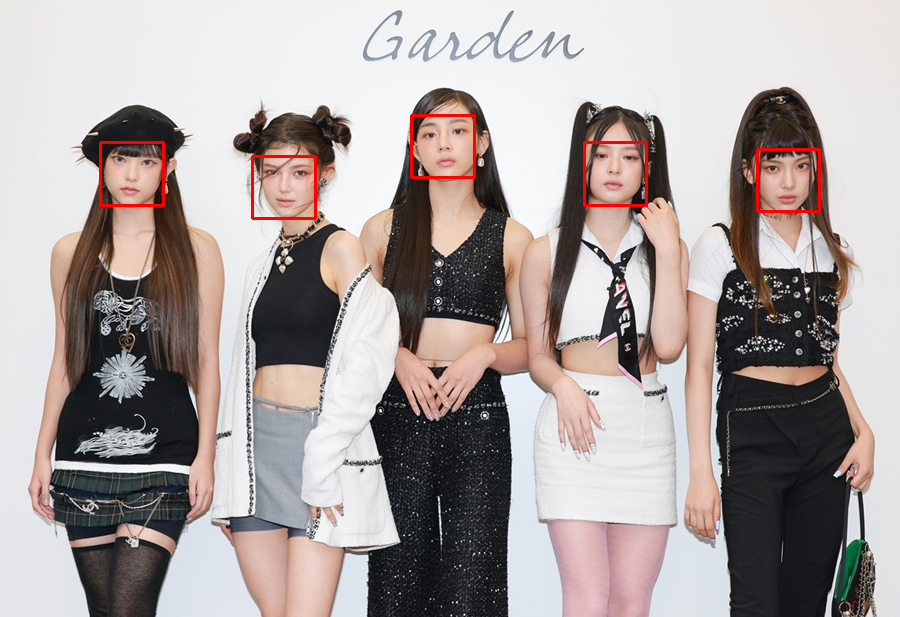

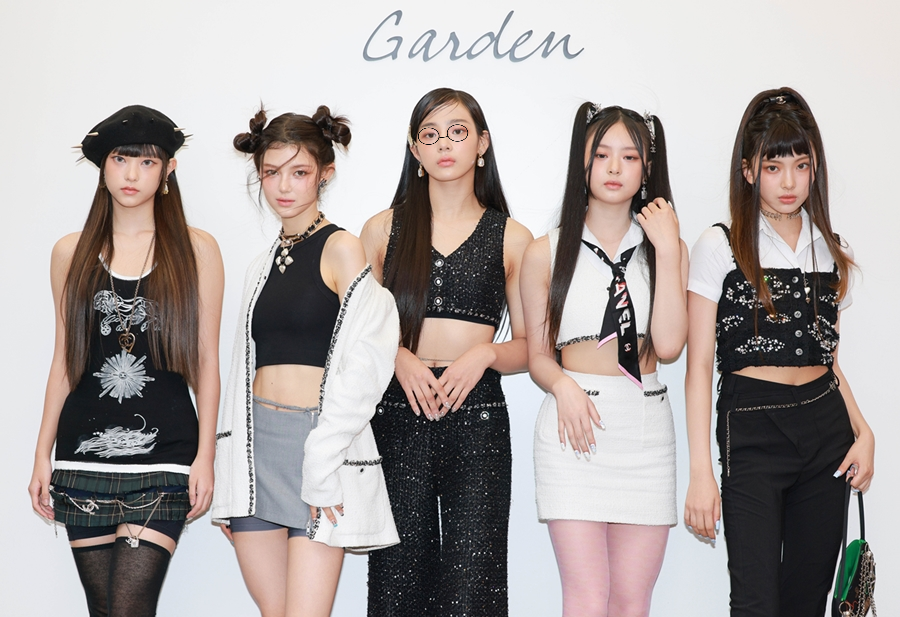

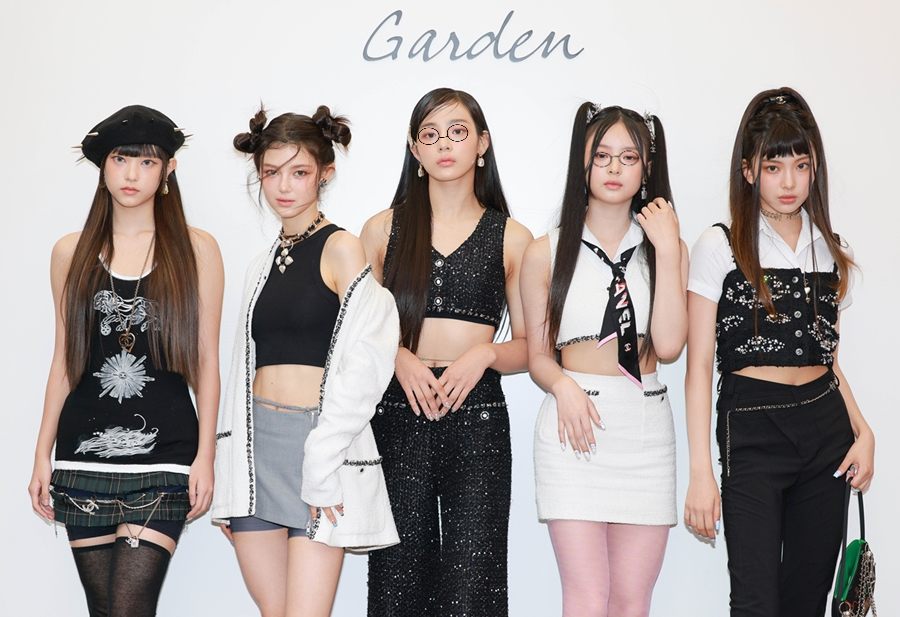

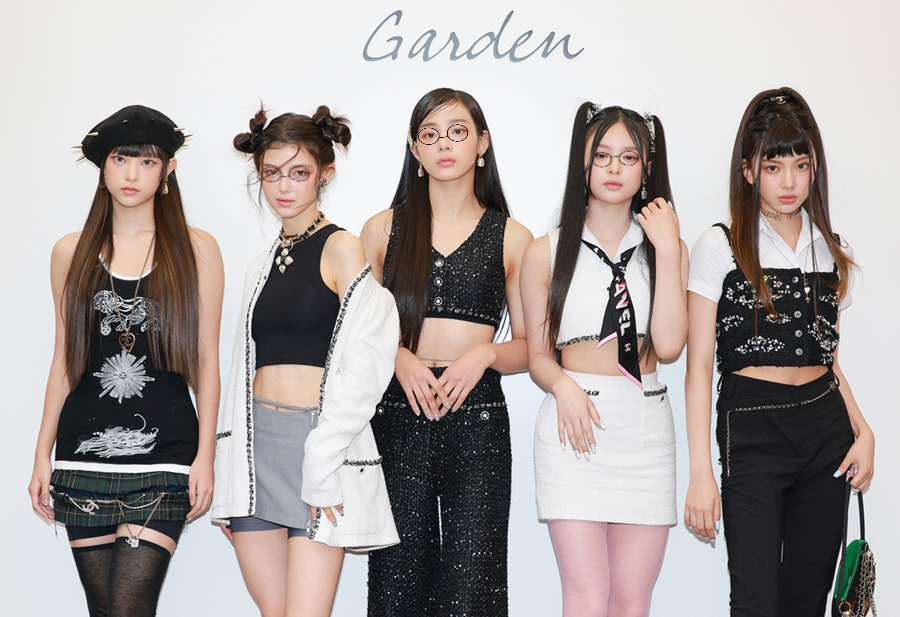

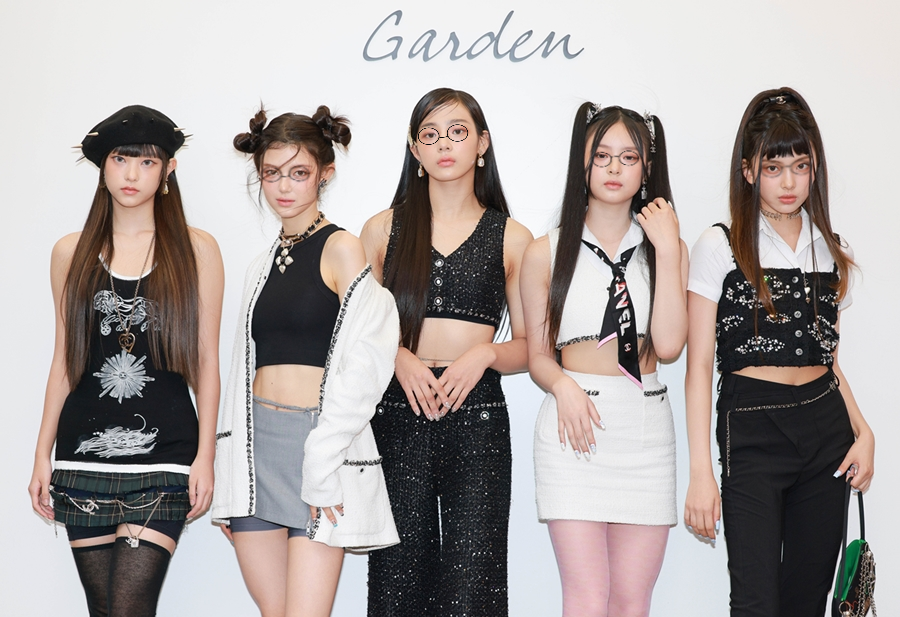

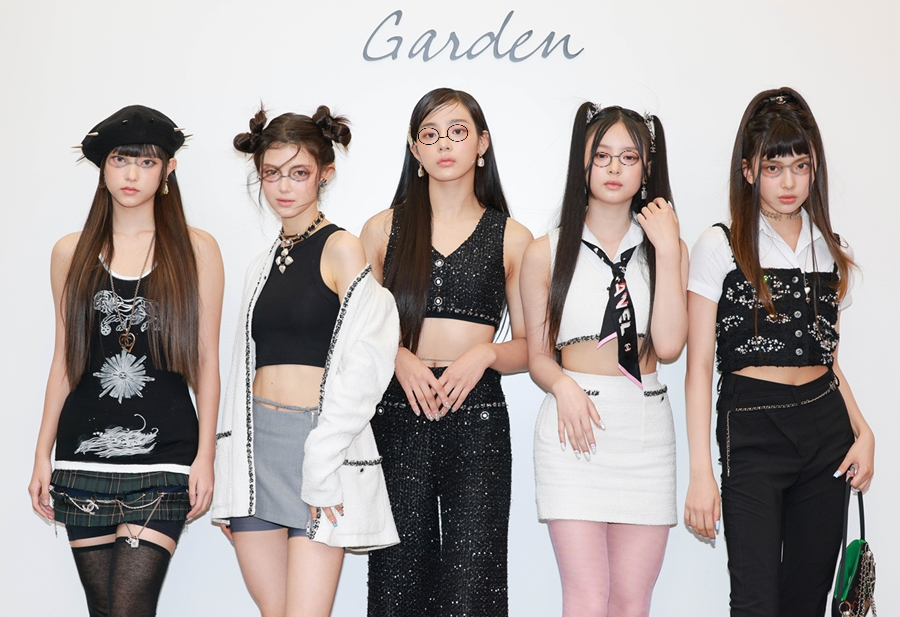

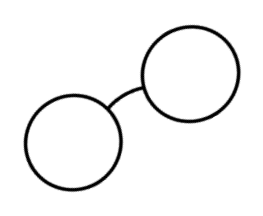

In [63]:
import cv2
import dlib
from google.colab.patches import cv2_imshow
import numpy as np

def detect_face(image_path):
  detector = dlib.get_frontal_face_detector()

  img = cv2.imread(image_path)
  faces = detector(img, 1)
  for face in faces:
    left_top = (face.left(), face.top())
    right_bottom = (face.right(), face.bottom())
    cv2.rectangle(img, left_top, right_bottom, (0,0,255),2) #bgr
  
  cv2_imshow(img)
 

def face_detect(image):
  left_top = (0,0)
  right_bottom = (0,0)

  detector = dlib.get_frontal_face_detector()
  face_rect_list = detector(image, 1)

  if len(face_rect_list) > 0:
    face_rect = face_rect_list[0]
    left_top = (face_rect.left(), face_rect.top())
    right_bottom = (face_rect.right(), face_rect.bottom())

  return left_top, right_bottom

def face_sample(img):
  image = cv2.imread(img)
  lt, rb = face_detect(image)
  cv2.rectangle(image, lt, rb, (0,0,255), thickness=1)
  cv2_imshow(image)

def face_detect_multi(image):
  detector = dlib.get_frontal_face_detector()
  face_rect_list = detector(image, 1)

  results = []

  for face_rect in face_rect_list:
    left_top = (face_rect.left(), face_rect.top())
    right_bottom = (face_rect.right(), face_rect.bottom())
    results.append((left_top, right_bottom))

  return results

def face_sample1(img):
  image = cv2.imread(img)
  for lt, rb in face_detect_multi(image):
    print(lt, rb)
    cv2.rectangle(image, lt, rb, (0,0,255), thickness=1)
    # cv2.circle(image, ((lt + rb)/2), ((rb-lt)/2), (0,0,255), thickness=1)
    #cv2.circle(img, center, radius, color, thickness)
  cv2_imshow(image)
  

def draw_landmark_point(image_path): #point 추가
  detector = dlib.get_frontal_face_detector()
  predictor = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')
  

  img = cv2.imread(image_path)
  faces = detector(img, 1)
  for face in faces:
    shape = predictor(img, face)
    for x in range(68):
      pts = (shape.part(x).x, shape.part(x).y)
      cv2.circle(img, pts, 1, (255,0,0), cv2.FILLED, cv2.LINE_AA)
    cv2_imshow(img)
   

def draw_landmark(image_path):
  detector = dlib.get_frontal_face_detector()
  predictor = dlib.shape_predictor('/content/shape_predictor_68_face_landmarks.dat')

  image = cv2.imread(image_path)

  for face_rect in detector(image, 0):
    shape = predictor(image, face_rect)
    for x in range(68):
      pts = (shape.part(x).x, shape.part(x).y)
      cv2.circle(image, pts, 1, (255,0,0),cv2.FILLED, cv2.LINE_AA)
      cv2.putText(image, f"{x}", pts, cv2.FONT_HERSHEY_DUPLEX, 0.5, (0,0,255), 1, cv2.LINE_AA)
  
  cv2_imshow(image)


detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/content/shape_predictor_68_face_landmarks.dat")

def detect_faces(img):
  result = []
  for face_rect in detector(img, 1):
    shape = predictor(img, face_rect)
    result.append(shape)
  return result



def blend_glasses(image, glasses, faces):
  for face in faces:
    angle = calculate_face_angle(face)
    glasses = rotate(glasses, angle)
    glasses_shape = glasses.shape

    glasses_width = int((face.part(45).x - face.part(36).x) * 1.4)
    left = int(face.part(36).x - glasses_width * 0.15)
    glass_height = int(glasses_width / glasses_shape[1] * glasses_shape[0])
    top = int((face.part(36).y + face.part(45).y) / 2 - glass_height / 2.5)

    glasses = cv2.resize(glasses, (glasses_width, int(glasses_width / 240 * 112)))
    alpha = cv2.cvtColor(glasses[:,:,3], cv2.COLOR_GRAY2BGR) / 255.0
    image[top:top+glasses.shape[0], left:left+glasses.shape[1],:3] = \
    (1.0 - alpha) * image[top:top+glasses.shape[0], left:left+glasses.shape[1], :3] + alpha * glasses[:,:,:3]

    cv2_imshow(image)
  

def calculate_face_angle(face):
  x = int(face.part(36).x - face.part(45).x)
  y = int(face.part(36).y - face.part(45).y)
  angle = np.arctan2(y, x) * -180 / np.pi
  return angle

def rotate(img, angle, scale = 1.0):
  h,w,_ = img.shape
  center = (w // 2, h // 2)
  M = cv2.getRotationMatrix2D(center, angle, scale)

  cos = np.abs(M[0,0])
  sin = np.abs(M[0,1])
  newW = int((h * sin) + (w * cos))
  newH = int((h * cos) + (w * sin))

  M[0,2] += (newW / 2) - center[0]
  M[1,2] += (newH / 2) - center[1]

  rotated_img = cv2.warpAffine(img, M, (newW, newH))
  return rotated_img

## alpha + glassess[:,:,3]


  # center  = (img.shape[1] // 2, img.shape[0] // 2)
  # M = cv2.getRotationMatrix2D(center, angle, scale)

  # rotated_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
  # return rotated_img


if __name__ == '__main__':
  # img = "/content/사진.webp" #한소희
  # img = '/content/model.jpeg'
  # img = "/content/1636172328831.jpeg"
  # img = "/content/사진3.jpeg" #뉴진스
  detect_face("/content/사진3.jpeg")
  # face_sample(img)
  # face_detect_multi(img)
  # face_sample1(img)
  image = cv2.imread("/content/사진3.jpeg")
  faces = detect_faces(image)
  glasses = cv2.imread("/content/glasses.png", cv2.IMREAD_UNCHANGED)
  # draw_landmark(img)
  blend_glasses(image, glasses, faces)

  rotated_glasses = rotate(glasses, 30)
  cv2_imshow(rotated_glasses)


